In [1]:
import numpy as np

In [22]:
import numpy as np
class LinearRegression:
    
    def fit(self, X, y, lr = 0.001, epochs=10000, verbose=True, batch_size=1):
        X = self.add_bias(X)
        self.weights = np.zeros(len(X[0]))
        for i in range(epochs):
            idx = np.random.choice(len(X), batch_size) 
            X_batch, y_batch =  X[idx], y[idx]
            self.weights -= lr * self.get_gradient(X_batch, y_batch)
            if i % 1000 == 0 and verbose: 
                print('Iterations: %d - Error : %.4f' %(i, self.get_loss(X,y)))
                
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def get_loss(self, X, y):
        return np.mean((y - self.predict_(X)) ** 2)
    
    def predict_(self, X):
        return np.dot(X,self.weights)
    
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(len(X)), axis=1)
        
    def get_gradient(self, X, y):
        return -1.0 * np.dot(y - self.predict_(X), X) / len(X)
    
    def evaluate(self, X, y):
        return self.get_loss(self.add_bias(X), y)

In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train, lr=0.1, batch_size=len(diabetes_X_train))

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Iterations: 0 - Error : 24942.8242
Iterations: 1000 - Error : 5226.2542
Iterations: 2000 - Error : 4762.3519
Iterations: 3000 - Error : 4467.6732
Iterations: 4000 - Error : 4282.1217
Iterations: 5000 - Error : 4164.3107
Iterations: 6000 - Error : 4087.3453
Iterations: 7000 - Error : 4038.4663
Iterations: 8000 - Error : 4008.3744
Iterations: 9000 - Error : 3990.3957


Coefficients: 
 [152.03011621 840.05939248]
Mean squared error: 2647.52
Variance score: 0.45


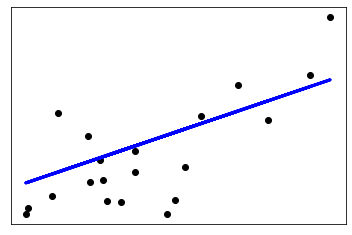

In [24]:
print('Coefficients: \n', regr.weights)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()